<a href="https://colab.research.google.com/github/HimanshuSahoo/DATA-SCIENCE/blob/main/Books_Recommendation_System_based_on_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
books_data = pd.read_csv("D:/P79 G2/P79-G2-Private-Repo-main/P79-G2-Private-Repo-main/books_data_40.csv")
books_data.head()

,Unnamed: 0,title,author,average_rating,genre,description
0,0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...


In [ ]:
books_data.shape

(3352, 6)

In [ ]:
books_data = books_data.drop(['Unnamed: 0'],axis=True)
books_data.head()

,title,author,average_rating,genre,description
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...


### Data Exploration

In [ ]:
books_data.isnull().sum()

title             0
author            0
average_rating    0
genre             0
description       0
dtype: int64

In [ ]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3352 non-null   object 
 1   author          3352 non-null   object 
 2   average_rating  3352 non-null   float64
 3   genre           3352 non-null   object 
 4   description     3352 non-null   object 
dtypes: float64(1), object(4)
memory usage: 131.1+ KB


In [ ]:
books_data.duplicated().sum()

16

In [ ]:
df = books_data.drop_duplicates()
df.shape

(3336, 5)

In [ ]:
df['genre'].value_counts()

Fiction        802
Nonfiction     391
Fantasy        324
Classics       302
Young Adult    182
              ... 
Music            1
LGBT             1
Academic         1
Literature       1
Design           1
Name: genre, Length: 77, dtype: int64

<AxesSubplot:>

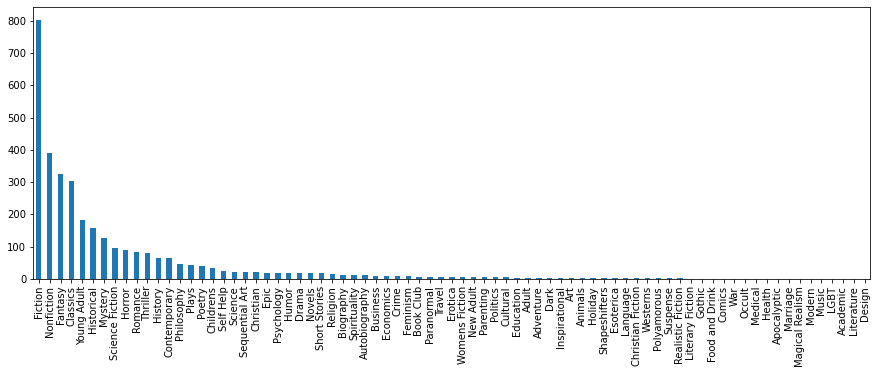

In [ ]:
df['genre'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(15,5))

### Data Preprocessing

In [ ]:
df['genre'].unique()

array(['Classics', 'Nonfiction', 'Historical', 'Fantasy', 'Fiction',
       'Young Adult', 'Childrens', 'Science Fiction', 'Poetry', 'Horror',
       'History', 'Mystery', 'Travel', 'Romance', 'Philosophy', 'Science',
       'Sequential Art', 'Christian', 'Academic', 'Self Help', 'Language',
       'Thriller', 'Religion', 'Plays', 'Cultural', 'Contemporary',
       'Drama', 'Autobiography', 'Esoterica', 'Short Stories', 'Crime',
       'Psychology', 'Feminism', 'Christian Fiction', 'Adventure',
       'Biography', 'Food and Drink', 'Spirituality', 'Paranormal',
       'Holiday', 'Novels', 'Epic', 'Inspirational', 'Apocalyptic',
       'Book Club', 'Realistic Fiction', 'Economics', 'Polyamorous',
       'Marriage', 'Education', 'Humor', 'Art', 'Business', 'Politics',
       'Womens Fiction', 'Health', 'New Adult', 'Erotica',
       'Shapeshifters', 'War', 'Design', 'Adult', 'Parenting', 'Gothic',
       'Animals', 'LGBT', 'Modern', 'Literature', 'Magical Realism',
       'Music', 'Dark'

<ipython-input-12-555c2e112e4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))  # Plotting the word count


<Figure size 864x720 with 0 Axes>

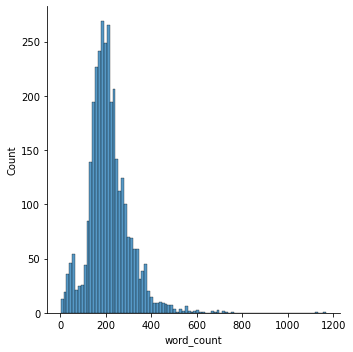

In [ ]:
#Calculating the word count for book description and adding a new column to the dataframe

import seaborn as sns
import matplotlib.pyplot as plt

df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))  # Plotting the word count
plt.figure(figsize=[12, 10])
sns.displot(df['word_count'])

In [ ]:
df.head()

,title,author,average_rating,genre,description,word_count
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195


In [ ]:
#filtering books with genres consiting more than 100 books
df = df[df['genre'].map(df['genre'].value_counts())>100]

In [ ]:
df

,title,author,average_rating,genre,description,word_count
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195
...,...,...,...,...,...,...
3345,Laskar Pelangi,Andrea Hirata,4.22,Fiction,Begitu banyak hal menakjubkan yang terjadi dal...,216
3346,The Moon and Sixpence,W. Somerset Maugham,4.13,Fiction,"Based on the life of Paul Gauguin, The Moon an...",176
3348,The Cruel Prince,Holly Black,4.09,Fantasy,This is a previously published cover edition o...,262
3350,My Name is Joe,Stefan Bourque,3.65,Fiction,When Joe's doctor advises him to get his affai...,155


In [ ]:
df['genre'].value_counts()

Fiction        802
Nonfiction     391
Fantasy        324
Classics       302
Young Adult    182
Historical     159
Mystery        127
Name: genre, dtype: int64

In [ ]:
# creating a sub dataframe of fiction books with  less than 160 word count.
# As description is our main criteria for model accuracy and prediction , we are removing the books which has low word count.
df2 = df[(df.genre == 'Fiction') & (df.word_count <= 160)]
# dropping the  rows created in df2 from the df column.
df.drop(df2.index,axis=0,inplace=True)

In [ ]:
df.genre.value_counts()
# Updated genre count.

Fiction        598
Nonfiction     391
Fantasy        324
Classics       302
Young Adult    182
Historical     159
Mystery        127
Name: genre, dtype: int64

array([<AxesSubplot:ylabel='genre'>], dtype=object)

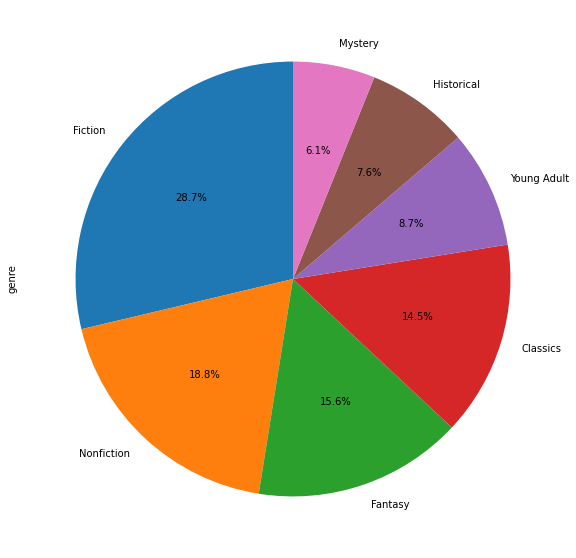

In [ ]:
df.genre.value_counts().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [ ]:
#print the title and description of a random sample

print(df['title'][10])
df['description'][10]

Romeo and Juliet


'In Romeo and Juliet, Shakespeare creates a violent world, in which two young people fall in love. It is not simply that their families disapprove; the Montagues and the Capulets are engaged in a blood feud.In this death-filled setting, the movement from love at first sight to the lovers’ final union in death seems almost inevitable. And yet, this play set in an extraordina\nIn Romeo and Juliet, Shakespeare creates a violent world, in which two young people fall in love. It is not simply that their families disapprove; the Montagues and the Capulets are engaged in a blood feud.In this death-filled setting, the movement from love at first sight to the lovers’ final union in death seems almost inevitable. And yet, this play set in an extraordinary world has become the quintessential story of young love. In part because of its exquisite language, it is easy to respond as if it were about all young lovers.\n...more'

In [ ]:
#Applying natural language processing techniques to pre-process the books descriptions:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
  
  
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
  
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_description(text):
  text = text.lower()
  temp_sent =[]
  words = nltk.word_tokenize(text)
  tags = nltk.pos_tag(words)
  for i, word in enumerate(words):
      if tags[i][1] in VERB_CODES: 
          lemmatized = lemmatizer.lemmatize(word, 'v')
      else:
          lemmatized = lemmatizer.lemmatize(word)
      if lemmatized not in stop_words and lemmatized.isalpha():
          temp_sent.append(lemmatized)
          
  finalsent = ' '.join(temp_sent)
  finalsent = finalsent.replace("n't", " not")
  finalsent = finalsent.replace("'m", " am")
  finalsent = finalsent.replace("'s", " is")
  finalsent = finalsent.replace("'re", " are")
  finalsent = finalsent.replace("'ll", " will")
  finalsent = finalsent.replace("'ve", " have")
  finalsent = finalsent.replace("'d", " would")
  return finalsent
  
df["desc_processed"] = df["description"].apply(preprocess_description)
df.head()

,title,author,average_rating,genre,description,word_count,desc_processed
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202,unforgettable novel childhood sleepy southern ...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158,alternate cover edition isbn immediate success...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232,discover attic spend last year life anne frank...
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187,librarian note alternate cover edition edition...
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195,pilot strand desert awake one morning see stan...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform((df["desc_processed"]))

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(2083, 21892)

In [ ]:
tfidf.get_feature_names()

C:\Users\mruge\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'ab',
 'aback',
 'abaddon',
 'abagnale',
 'abandon',
 'abandoned',
 'abandonment',
 'abandonnent',
 'abarcan',
 'abb',
 'abba',
 'abbey',
 'abbie',
 'abbot',
 'abbott',
 'abby',
 'abbzug',
 'abc',
 'abduct',
 'abduction',
 'abducts',
 'abdul',
 'abdullah',
 'abdulrahman',
 'abe',
 'abedin',
 'abel',
 'abelard',
 'aber',
 'aberdeen',
 'abet',
 'abeyance',
 'abhor',
 'abhorsen',
 'abide',
 'abiding',
 'abigail',
 'abilene',
 'abilitie',
 'ability',
 'abinger',
 'abject',
 'ablaze',
 'able',
 'abnegation',
 'abnormally',
 'aboard',
 'abolish',
 'abolition',
 'abolitionist',
 'abomination',
 'aboriginal',
 'aborigine',
 'abortion',
 'abou',
 'abound',
 'abraham',
 'abridge',
 'abridged',
 'abroad',
 'abrogation',
 'abrupt',
 'abruptly',
 'absalom',
 'absence',
 'absent',
 'absolut',
 'absolute',
 'absolutely',
 'absorb',
 'absurd',
 'absurdity',
 'absurdly',
 'abt',
 'abu',
 'abulhejas',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abusive',
 'abuzz',
 'abyss',
 'ac',
 'aca

In [ ]:
# Finding cosine similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(X, X)

In [ ]:
cos_sim.shape

(2083, 2083)

In [ ]:
cos_sim[:4, :4]

array([[1.        , 0.05347151, 0.0361203 , 0.02386303],
       [0.05347151, 1.        , 0.00535745, 0.06354939],
       [0.0361203 , 0.00535745, 1.        , 0.02053534],
       [0.02386303, 0.06354939, 0.02053534, 1.        ]])

In [ ]:
#Construct a reverse map of indices and book titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
indices[:10]

title
To Kill a Mockingbird        0
Pride and Prejudice          1
The Diary of a Young Girl    2
Animal Farm                  3
The Little Prince            4
The Great Gatsby             5
The Catcher in the Rye       6
The Lord of the Rings        7
The Book Thief               8
The Chronicles of Narnia     9
dtype: int64

In [ ]:
# Function that takes in book title as input and outputs most similar movies

def get_recommendations(title, cosine_sim=cos_sim):
    # Get the index of the book that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cos_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[book_indices]

In [ ]:
get_recommendations('To Kill a Mockingbird')

1227                                    Go Set a Watchman
397                    Harper Lee's To Kill a Mockingbird
240               How to Win Friends and Influence People
257     All Creatures Great and Small / All Things Bri...
220                                     Things Fall Apart
2718                            The Magnificent Ambersons
1567                              Almost Transparent Blue
1646    The Language Instinct: How the Mind Creates La...
178                                               Beloved
582                                          The Alienist
Name: title, dtype: object